# Hierarchical Clustering - Crime Data

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
#load data and view it
crime = crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

### Min Max

In [4]:
#importing MinMax module
from sklearn.preprocessing import MinMaxScaler

In [11]:
#delifining data with ilocator indexing
data = crime.iloc[:,1:5]

In [12]:
#calling MinMax Scalear for norm
norm = MinMaxScaler()

In [13]:
#fitting data
norm.fit(data)

MinMaxScaler()

In [14]:
#Transforming data
norm_data = norm.transform(data)
print(norm_data)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [15]:
#type
type(norm_data)

numpy.ndarray

### Hierarchical Clustering

In [16]:
#import module
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [17]:
hier = linkage(norm_data, method="complete",metric="euclidean")

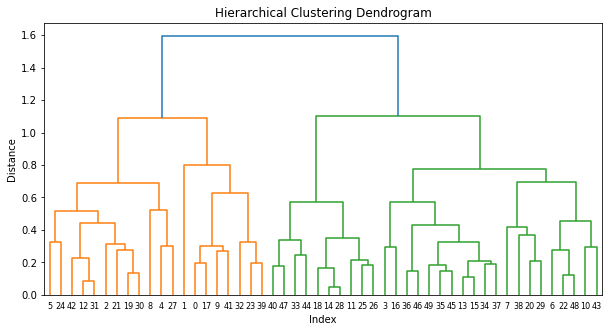

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(hier,leaf_rotation=0.,leaf_font_size=8.)
plt.show()
# Leaf_rotation = rotates the x axis labels
# Leaf_font_size = font size for the x axis labels

In [19]:
#import agglomerative Clustering from sklearn
from sklearn.cluster import AgglomerativeClustering

In [22]:
h_comp = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(norm_data) 

In [23]:
cluster_labels=pd.Series(h_comp.labels_)

In [25]:
data['clust']=cluster_labels

In [26]:
# getting aggregate mean of each cluster
cl1 = data.iloc[:,1:12].groupby(data.clust).median()
cl1

,Assault,UrbanPop,Rape,clust
clust,,,,
0,254.5,70.0,27.35,0
1,132.5,70.0,18.40,1
2,82.0,52.0,11.25,2
